In [280]:
#IMPORT NECESSARY LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

In [281]:
#READ DATA
df=pd.read_csv(r"C:\Users\Vivek\numpy\BikeCaseStudy\day.csv")

In [282]:
#HAVE LOOK AT DATA
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [283]:
#To check columns present in dataset
print(df.columns)

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


In [284]:
#Get basic idea of data using describe()
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [285]:
#checking for null values in dataset

count=df.isnull().sum()
print(count)

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [286]:
#checking for datatypes of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [287]:
#from the given data we can see that instant is an index column so we drop it
df.drop(['instant'],axis=1,inplace=True)

In [288]:
df.head(10)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [289]:
#we can see column dteday and yr month are having same data so we can drop dteday to avoid confusion

df.drop(['dteday'],axis=1,inplace=True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [290]:
#we know that casual+registered=cnt and cnt is our target variable so we will not consider casual and registered
df.drop(['casual','registered'],axis=1,inplace=True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [291]:
#check for datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [292]:
#from data we can see that: season,yr,mnth,holiday,weekday,workingday,weathersit all are categorical variables
#We will replace season,weekday and weathersit with appropriate values
df['season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)
df.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,1321


In [293]:
df['weathersit'].replace({1:"Clear_Few Clouds",2:"Mist_cloudy",3:"Light rain_Light snow_Thunderstorm",4:'Heavy Rain_Ice Pallets_Thunderstorm_Mist'},inplace=True)
df.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,Clear_Few Clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,Clear_Few Clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,Clear_Few Clouds,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,1,0,4,1,Clear_Few Clouds,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,1,0,5,1,Mist_cloudy,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,1,0,6,0,Mist_cloudy,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,1,0,0,0,Clear_Few Clouds,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,1,0,1,1,Clear_Few Clouds,6.184153,7.54440,48.2917,14.958889,1321


In [294]:
df['weekday'].replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"},inplace=True)
df.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,Saturday,0,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,Sunday,0,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,Monday,1,Clear_Few Clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,Tuesday,1,Clear_Few Clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,Wednesday,1,Clear_Few Clouds,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,1,0,Thursday,1,Clear_Few Clouds,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,1,0,Friday,1,Mist_cloudy,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,1,0,Saturday,0,Mist_cloudy,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,1,0,Sunday,0,Clear_Few Clouds,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,1,0,Monday,1,Clear_Few Clouds,6.184153,7.54440,48.2917,14.958889,1321


In [295]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 68.6+ KB


In [296]:
#changing datatypes of numerical columns to appropriate types

df[['temp','atemp','hum','windspeed','cnt']]=df[['temp','atemp','hum','windspeed','cnt']].apply(pd.to_numeric)

In [297]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 68.6+ KB


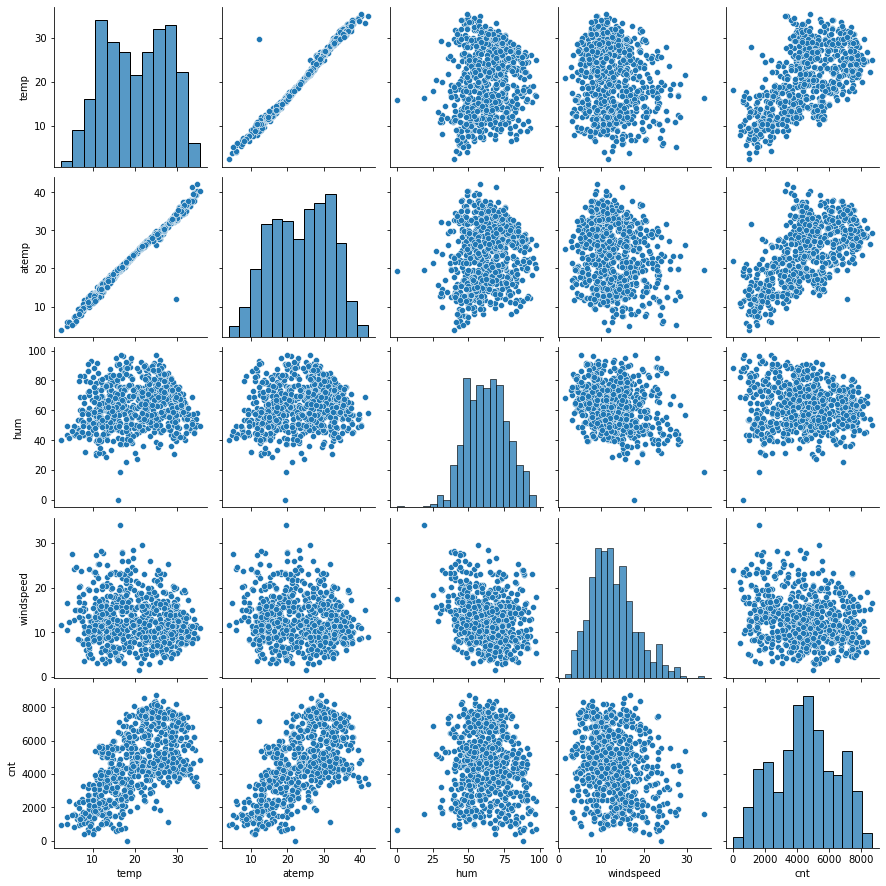

In [298]:
#Performing EDA

# 1)PAIRPLOTS TO UNDERSTAND NUMERICAL VARIABLES
sns.pairplot(df, vars=['temp','atemp','hum','windspeed',"cnt"])
plt.show()

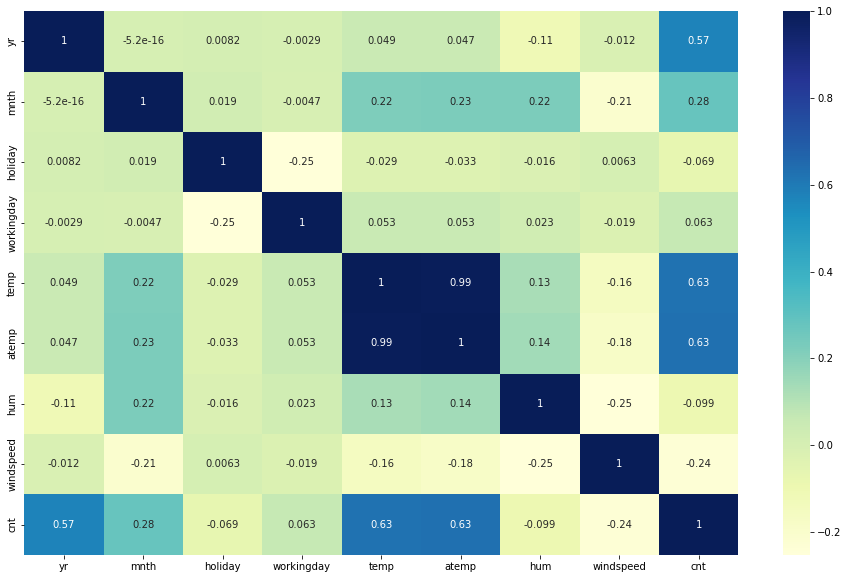

In [299]:
# from above graphs we can say that temp and atemp have a relationship
#let check the correlation
plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [300]:
#correlation between temp and atemp is 0.99 which is almost 1
#Let us drop temp and consider atemp

df.drop(['temp'],axis=1,inplace=True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,1,0,Saturday,0,Mist_cloudy,18.18125,80.5833,10.749882,985
1,spring,0,1,0,Sunday,0,Mist_cloudy,17.68695,69.6087,16.652113,801
2,spring,0,1,0,Monday,1,Clear_Few Clouds,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,Tuesday,1,Clear_Few Clouds,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,Wednesday,1,Clear_Few Clouds,11.46350,43.6957,12.522300,1600


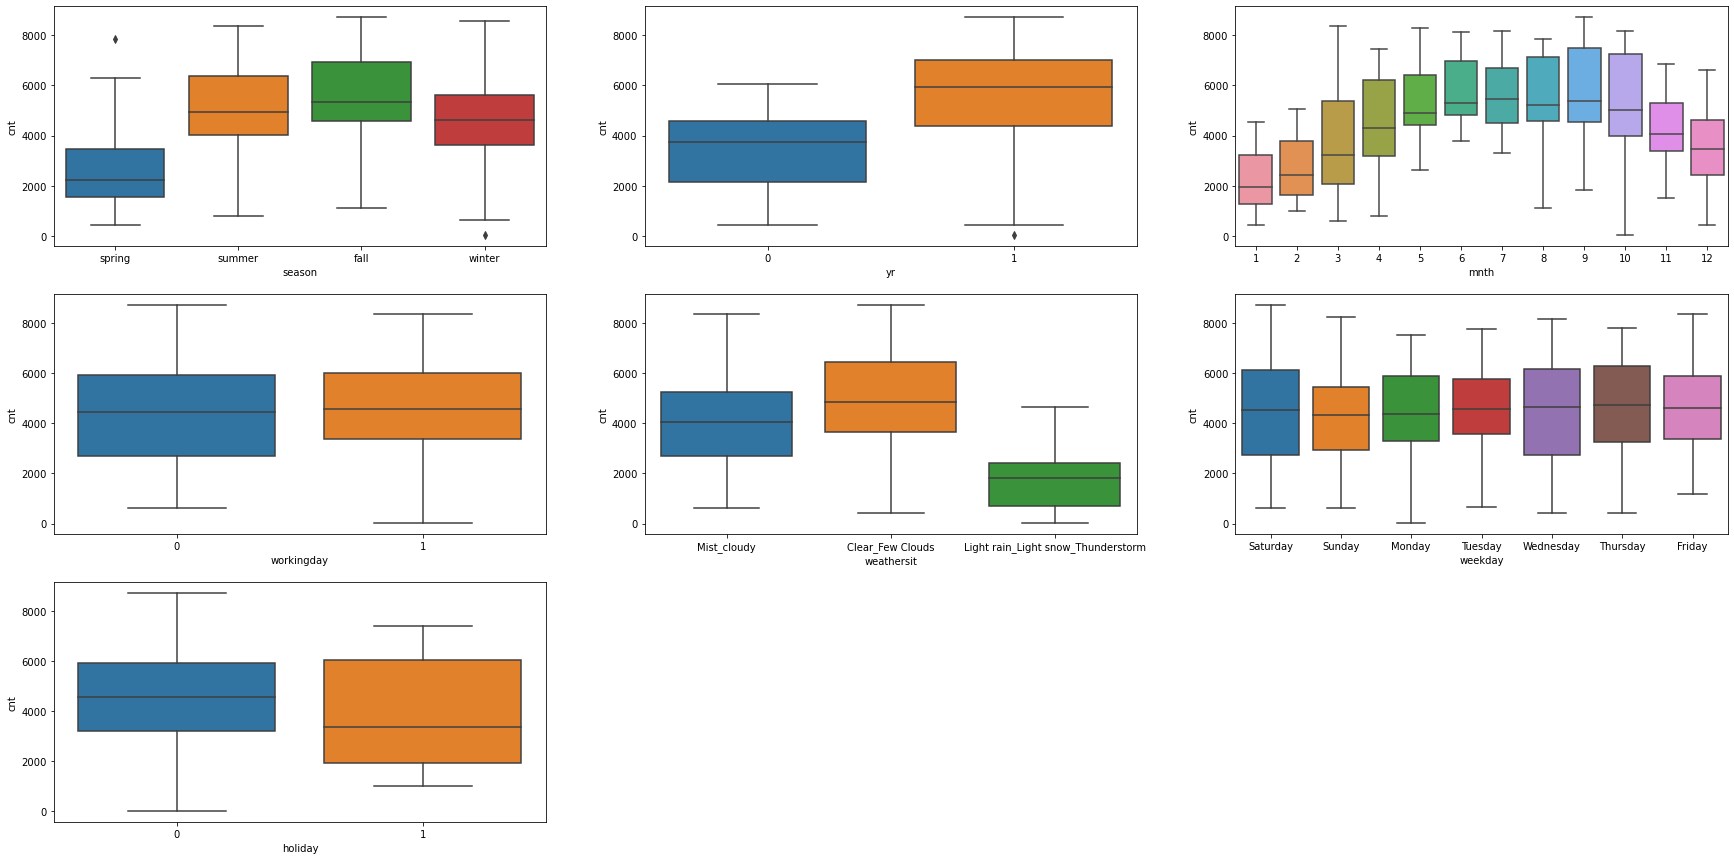

In [301]:
#Visualising categorical Variables to understand data better
plt.figure(figsize=(30, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)#yr','mnth','workingday','weathersit','weekday'
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(3,3,7)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.show()

# Creating dummy variables

In [302]:
#Convert variables to object type
df['mnth']=df['mnth'].astype(object)
df['season']=df['season'].astype(object)
df['weathersit']=df['weathersit'].astype(object)
df['weekday']=df['weekday'].astype(object)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   atemp       730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


In [303]:
#CREATING DUMMY VARIABLES FOR CATEGORICAL DATA 

Season_condition=pd.get_dummies(df['season'],drop_first=True)
Weather_condition=pd.get_dummies(df['weathersit'],drop_first=True)
Day_of_week=pd.get_dummies(df['weekday'],drop_first=True)
Month=pd.get_dummies(df['mnth'],drop_first=True)

In [304]:
df=pd.concat([df,Season_condition],axis=1)
df=pd.concat([df,Weather_condition],axis=1)
df=pd.concat([df,Day_of_week],axis=1)
df=pd.concat([df,Month],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   season                              730 non-null    object 
 1   yr                                  730 non-null    int64  
 2   mnth                                730 non-null    object 
 3   holiday                             730 non-null    int64  
 4   weekday                             730 non-null    object 
 5   workingday                          730 non-null    int64  
 6   weathersit                          730 non-null    object 
 7   atemp                               730 non-null    float64
 8   hum                                 730 non-null    float64
 9   windspeed                           730 non-null    float64
 10  cnt                                 730 non-null    int64  
 11  spring                              730 non-n

In [305]:
#Deleting the orginal columns season.weathersit,weekday,mnth
df.drop(['season'],axis=1,inplace=True)
df.drop(['weathersit'],axis=1,inplace=True)

df.drop(['weekday'],axis=1,inplace=True)

df.drop(['mnth'],axis=1,inplace=True)


df.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,Light rain_Light snow_Thunderstorm,Mist_cloudy,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,2,3,4,5,6,7,8,9,10,11,12
0,0,0,0,18.18125,80.5833,10.749882,985,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,17.68695,69.6087,16.652113,801,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [306]:
#Now are data is ready to split
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,Light rain_Light snow_Thunderstorm,Mist_cloudy,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,2,3,4,5,6,7,8,9,10,11,12
653,1,0,1,23.0423,55.8333,12.208807,7534,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
576,1,0,1,33.1448,70.4167,11.083475,7216,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
426,1,0,0,20.6746,62.1250,10.792293,4066,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
728,1,0,0,11.5850,48.3333,23.500518,1796,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
482,1,0,0,18.8752,48.9583,8.708325,4220,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [307]:
df_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,Light rain_Light snow_Thunderstorm,Mist_cloudy,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,2,3,4,5,6,7,8,9,10,11,12
184,0,1,0,33.27085,63.7917,5.459106,6043,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
535,1,0,1,36.04875,59.2083,7.625404,6211,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
299,0,0,1,22.85230,81.2917,13.250121,2659,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
221,0,0,1,34.24915,42.4167,13.417286,4780,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
152,0,0,1,32.19710,30.5000,19.583229,4968,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [308]:
df_train.columns

Index([                                'yr',
                                  'holiday',
                               'workingday',
                                    'atemp',
                                      'hum',
                                'windspeed',
                                      'cnt',
                                   'spring',
                                   'summer',
                                   'winter',
       'Light rain_Light snow_Thunderstorm',
                              'Mist_cloudy',
                                   'Monday',
                                 'Saturday',
                                   'Sunday',
                                 'Thursday',
                                  'Tuesday',
                                'Wednesday',
                                          2,
                                          3,
                                          4,
                                          5,
          

In [309]:
#SCALING THE NUMERICAL DATA
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [310]:
num_vars=['atemp','hum','windspeed',]
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [311]:
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,Light rain_Light snow_Thunderstorm,Mist_cloudy,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,2,3,4,5,6,7,8,9,10,11,12
653,1,0,1,0.501133,0.575354,0.300794,7534,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
576,1,0,1,0.766351,0.725633,0.264686,7216,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,4066,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
728,1,0,0,0.200348,0.498067,0.663106,1796,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
482,1,0,0,0.391735,0.504508,0.188475,4220,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [312]:
df_train.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,Light rain_Light snow_Thunderstorm,Mist_cloudy,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,2,3,4,5,6,7,8,9,10,11,12
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.512989,0.650369,0.320768,4486.382353,0.243137,0.245098,0.24902,0.029412,0.343137,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.066667,0.098039,0.078431,0.084314,0.074510,0.076471,0.096078,0.080392,0.086275,0.086275,0.084314
std,0.500429,0.157763,0.468282,0.212385,0.145882,0.169797,1952.158739,0.429398,0.430568,0.43287,0.169124,0.475223,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.249689,0.297660,0.269113,0.278131,0.262857,0.266010,0.294988,0.272166,0.281045,0.281045,0.278131
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.332086,0.538643,0.199179,3120.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.526811,0.653714,0.296763,4530.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.688457,0.754830,0.414447,5973.500000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8714.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [313]:
#CREATING X AND Y
y_train = df_train.pop('cnt')
X_train = df_train

In [314]:
X_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,spring,summer,winter,Light rain_Light snow_Thunderstorm,Mist_cloudy,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,2,3,4,5,6,7,8,9,10,11,12
653,1,0,1,0.501133,0.575354,0.300794,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
576,1,0,1,0.766351,0.725633,0.264686,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
728,1,0,0,0.200348,0.498067,0.663106,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
482,1,0,0,0.391735,0.504508,0.188475,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [315]:
y_train.head()

653    7534
576    7216
426    4066
728    1796
482    4220
Name: cnt, dtype: int64

In [316]:
X_train.columns

Index([                                'yr',
                                  'holiday',
                               'workingday',
                                    'atemp',
                                      'hum',
                                'windspeed',
                                   'spring',
                                   'summer',
                                   'winter',
       'Light rain_Light snow_Thunderstorm',
                              'Mist_cloudy',
                                   'Monday',
                                 'Saturday',
                                   'Sunday',
                                 'Thursday',
                                  'Tuesday',
                                'Wednesday',
                                          2,
                                          3,
                                          4,
                                          5,
                                          6,
          

# Modelling

Approach

A mixed approach is followed.

15 Best columns are chosen using RFE.

And then p-value method is followed for further elimination.

Recursive Feature Elimination

In [317]:
# Selecting 15 Features using RFE 

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lr_estimator = LinearRegression()
rfe = RFE(lr_estimator,n_features_to_select=15, step=1)
selector = rfe.fit(X_train,y_train)

In [318]:
# RFE Feature Ranking
rfe_ranking = pd.DataFrame({'rank' : selector.ranking_, 'support': selector.support_, 'features' : X_train.columns}).sort_values(by='rank',ascending=True)
rfe_ranking

,rank,support,features
0,1,True,yr
24,1,True,9
23,1,True,8
20,1,True,5
12,1,True,Saturday
10,1,True,Mist_cloudy
9,1,True,Light rain_Light snow_Thunderstorm
8,1,True,winter
13,1,True,Sunday
6,1,True,spring


In [319]:
# Selected Features
selected_features = rfe_ranking.loc[rfe_ranking['rank'] == 1,'features'].values
selected_features

array(['yr', 9, 8, 5, 'Saturday', 'Mist_cloudy',
       'Light rain_Light snow_Thunderstorm', 'winter', 'Sunday', 'spring',
       'windspeed', 'holiday', 'hum', 'workingday', 'atemp'], dtype=object)

# Manual Elimination

In [320]:
# Following a stepwise elimination
import statsmodels.api as sm
def ols_fit(y,X) : 
    X_train_sm = sm.add_constant(X)
    model = sm.OLS(y,X_train_sm).fit()
    print(model.summary())
    return model
def vif(X) : 
    df = sm.add_constant(X)
    vif = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    vif_frame = pd.DataFrame({'vif' : vif[0:]},index = df.columns).reset_index()
    print(vif_frame.sort_values(by='vif',ascending=False))

Model 1

Using features selected by RFE : 'yr', 'Sunday', 'Saturday', 'november', 'january', 'december',

 'winter', 'july', 'spring', 'holiday', 'workingday', 'hum', 'temp',
 'windspeed', 'light snow/rain'

In [321]:
features_1 = selected_features
ols_fit(y_train,X_train[features_1])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     184.0
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          8.06e-186
Time:                        01:19:32   Log-Likelihood:                -4121.9
No. Observations:                 510   AIC:                             8274.
Df Residuals:                     495   BIC:                             8337.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

Model 2 :
    
Dropping holiday because of high p-value

In [322]:
del_feature = 'holiday'
selected_features = selected_features[selected_features!=del_feature]
ols_fit(y_train,X_train[selected_features])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     184.0
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          8.06e-186
Time:                        01:19:32   Log-Likelihood:                -4121.9
No. Observations:                 510   AIC:                             8274.
Df Residuals:                     495   BIC:                             8337.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

Model 3 :
Dropping Sunday because of high p-value

In [323]:
del_feature = 'Sunday'
selected_features = selected_features[selected_features!=del_feature]
ols_fit(y_train,X_train[selected_features])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     196.8
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          3.39e-186
Time:                        01:19:33   Log-Likelihood:                -4123.7
No. Observations:                 510   AIC:                             8275.
Df Residuals:                     496   BIC:                             8335.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

Model 4
Dropping january because this information might also be contained in winter.

In [324]:
del_feature = 'january'
selected_features = selected_features[selected_features!=del_feature]
ols_fit(y_train,X_train[selected_features])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     196.8
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          3.39e-186
Time:                        01:19:35   Log-Likelihood:                -4123.7
No. Observations:                 510   AIC:                             8275.
Df Residuals:                     496   BIC:                             8335.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

Model 5

Dropping december because this information might also be contained in winter.

In [325]:
del_feature = 'december'
selected_features = selected_features[selected_features!=del_feature]
ols_fit(y_train,X_train[selected_features])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     196.8
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          3.39e-186
Time:                        01:19:36   Log-Likelihood:                -4123.7
No. Observations:                 510   AIC:                             8275.
Df Residuals:                     496   BIC:                             8335.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

Model 6
Dropping november because this information might also be contained in winter.

In [326]:
del_feature = 'november'
selected_features = selected_features[selected_features!=del_feature]
final_model = ols_fit(y_train,X_train[selected_features])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     196.8
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          3.39e-186
Time:                        01:19:37   Log-Likelihood:                -4123.7
No. Observations:                 510   AIC:                             8275.
Df Residuals:                     496   BIC:                             8335.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

# Verifying MultiCollinearity

In [327]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif(X_train[selected_features])

                                 index        vif
0                                const  66.341536
13                               atemp   2.693079
9                               spring   2.650381
11                                 hum   1.939589
8                               winter   1.921493
12                          workingday   1.653401
5                             Saturday   1.644891
6                          Mist_cloudy   1.574160
3                                    8   1.306315
7   Light rain_Light snow_Thunderstorm   1.256723
4                                    5   1.256584
10                           windspeed   1.181544
2                                    9   1.160734
1                                   yr   1.030483


# Final Model

In [328]:
final_model = ols_fit(y_train,X_train[selected_features])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     196.8
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          3.39e-186
Time:                        01:19:39   Log-Likelihood:                -4123.7
No. Observations:                 510   AIC:                             8275.
Df Residuals:                     496   BIC:                             8335.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

10 features have been selected.

All the features are statistically significant [low p-value]

The model over is a good fit with Prob (F-statistic): 4.89e-187
    
The model explains 83.6% variability in the training data. Adjusted R-square being 83.3%

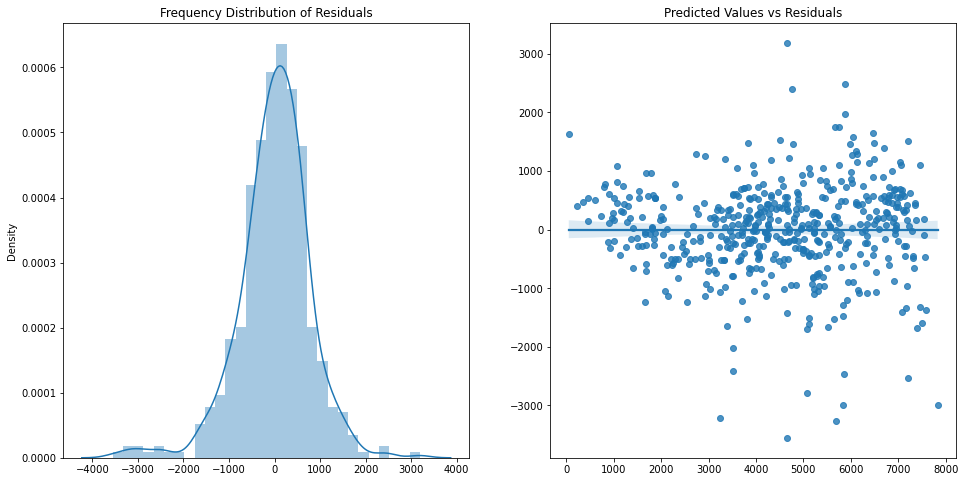

In [329]:
# Residual Analysis of Trained Data
X_train_sm = sm.add_constant(X_train[selected_features])

y_train_pred = final_model.predict(X_train_sm)
fig,ax = plt.subplots(1,2)
fig.set_figheight(8)
fig.set_figwidth(16)

ax[0].set(title='Frequency Distribution of Residuals')
sns.distplot(y_train-y_train_pred, bins=30, ax=ax[0])

ax[1].set(title='Predicted Values vs Residuals')
\
sns.regplot(y_train_pred,y_train-y_train_pred,ax=ax[1])
plt.show()

In [330]:
# Mean of Residuals
(y_train-y_train_pred).mean()

4.948721171411521e-13

Residual errors follow a normal distribution with mean=0

Variance of Errors doesnt follow any trends

Residual errors are independent of each other since the Predicted values vs Residuals plot doesn't show any trend.

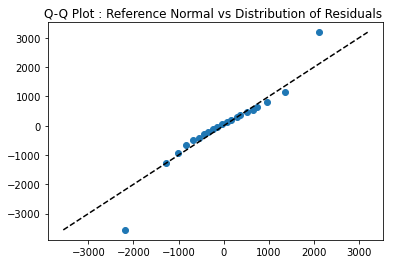

In [331]:
# Verifying the normality of distribution of residuals 
mean = (y_train-y_train_pred).mean()
std = (y_train-y_train_pred).std()

ref_normal = np.random.normal(mean,std,(y_train-y_train_pred).shape[0])


percs = np.linspace(0,100,21)
qn_ref_normal = np.percentile(ref_normal, percs)
qn_residual = np.percentile(y_train - y_train_pred , percs)

plt.plot(qn_ref_normal,qn_residual, ls="", marker="o")

x = np.linspace(np.min((qn_ref_normal.min(),qn_residual.min())), np.max((qn_ref_normal.max(),qn_residual.max())))
plt.plot(x,x, color="k", ls="--")
plt.title('Q-Q Plot : Reference Normal vs Distribution of Residuals ')
plt.show()

## This plot further shows that the residual distribution is approximately normal for all test data with values within range of training data. Extrapolated points show significant predict inaccuracy.

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

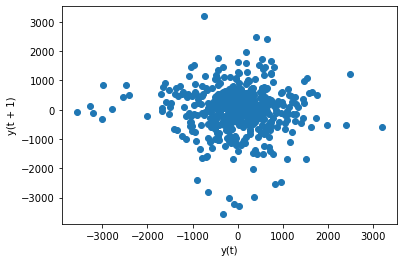

In [332]:
# lag plot to assess independence of data points
from pandas.plotting import lag_plot
lag_plot(y_train-y_train_pred)

Lagplot of residuals shows no trend. Hence the error terms have constant variance

## Hence, assumptions of Linear Regression are satisfied by this model

# Prediction

In [334]:
y_test = df_test.pop('cnt')
X_test = df_test
X_test[num_vars] = scaler.transform(X_test[num_vars])
X_test = X_test[selected_features]

In [335]:
X_test = sm.add_constant(X_test)
y_test_pred = final_model.predict(X_test)


# Model Evaluation

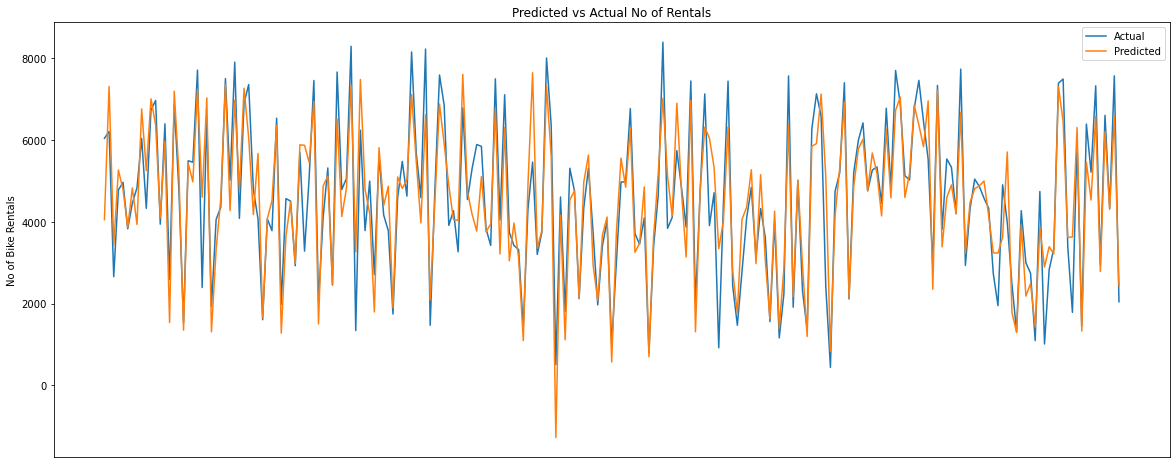

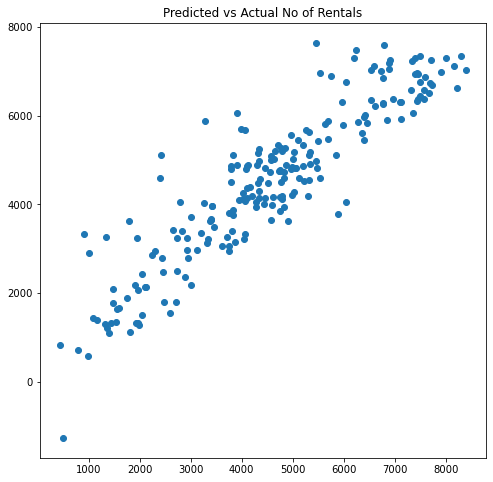

In [336]:
# Plotting Actual vs Predicted No of rentals 
fig,ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(20)
l1,=ax.plot(range(len(y_test)),y_test)
l2, = ax.plot(range(len(y_test_pred)),y_test_pred)
plt.legend([l1,l2],['Actual','Predicted'])
plt.title('Predicted vs Actual No of Rentals');
plt.ylabel('No of Bike Rentals')
plt.xticks([])
plt.show()

plt.figure(figsize=[8,8])
plt.scatter(y_test,y_test_pred);
plt.title('Predicted vs Actual No of Rentals');

Predicted vs observed value plots shows that the model is reasonably accurate.

In [337]:
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(y_test, y_test_pred)
rsquared_test = r2_score(y_test, y_test_pred)
rsquared_train = r2_score(y_train, y_train_pred)
print('R-squared for train data:',round(rsquared_train,2))
print('R-squared for test data:',round(rsquared_test,2))
print('Mean Squared Error',round(mse,3))

R-squared for train data: 0.84
R-squared for test data: 0.82
Mean Squared Error 647800.89


# Model Stability

In [338]:
# R-square using cross validation

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
clr = cross_val_score(lr,X_train[selected_features],y_train,cv=10, scoring='r2')
clr

array([0.79311654, 0.80898849, 0.86425847, 0.8202186 , 0.79941998,
       0.81036489, 0.742885  , 0.85568038, 0.86995766, 0.83764406])

In [339]:
print("R-square at 0.95 confidence level : %0.2f (+/- %0.2f)" % (clr.mean(), clr.std() * 2))

R-square at 0.95 confidence level : 0.82 (+/- 0.07)


In [340]:
selected_features

array(['yr', 9, 8, 5, 'Saturday', 'Mist_cloudy',
       'Light rain_Light snow_Thunderstorm', 'winter', 'spring',
       'windspeed', 'hum', 'workingday', 'atemp'], dtype=object)

# Top Features

In [347]:
# standardizing numerical variables 

from sklearn.preprocessing import StandardScaler
reg_features = selected_features
scaler = StandardScaler()
data = X_train[selected_features]
std_num = scaler.fit(df[['atemp','windspeed','hum']])


std_X_train = pd.DataFrame(data = scaler.transform(data[['atemp','windspeed','hum']]), columns=['atemp','windspeed','hum'])
for i in reg_features : 
    std_X_train[i] = data[i].values


reshaped_y_train = y_train.values.reshape(-1,1)

# Fitting linear regression model 
std_model = lr.fit(std_X_train, reshaped_y_train)

# Coefficients and intercept
result = pd.DataFrame(data = std_model.coef_, columns = std_X_train.columns, index=['MLR Coefficients']).T
result = result.sort_values(by='MLR Coefficients',ascending=False)
print('\nIntercept :',std_model.intercept_)
result


Intercept : [2554.18266918]


,MLR Coefficients
atemp,3897.777933
yr,2032.150471
9,729.759951
winter,550.949925
Saturday,541.178506
5,462.179244
workingday,453.844803
8,180.801726
Mist_cloudy,-513.391992
spring,-919.286431


Upon standardized the values of predictor variables, the above shows that the top features influencing demand are temp, followed by yr and hum

In case of continuous variables, the above data could be interpreted as - With every standard deviation increase in continuous variables, demand increases by xxx, when all other modelled paramters are held unchanged.

In case of categorical variables, the above data could be interpreted as - Compared to the reference level, the change in demand is xxx,, when all other modelled paramters are held unchanged.